<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing-publication" data-toc-modified-id="Preprocessing-publication-1">Preprocessing publication</a></span><ul class="toc-item"><li><span><a href="#publication.csv-revisited" data-toc-modified-id="publication.csv-revisited-1.1"><code>publication.csv</code> revisited</a></span></li><li><span><a href="#Preprocessing-summary--&gt;-summary_toks" data-toc-modified-id="Preprocessing-summary-->-summary_toks-1.2">Preprocessing <code>summary</code> -&gt; <code>summary_toks</code></a></span></li><li><span><a href="#Including-bi-gram-and-tri-gram" data-toc-modified-id="Including-bi-gram-and-tri-gram-1.3">Including bi-gram and tri-gram</a></span></li><li><span><a href="#Distribution-of-length-of-summary" data-toc-modified-id="Distribution-of-length-of-summary-1.4">Distribution of length of summary</a></span></li></ul></li><li><span><a href="#Preprocessing-scrapped-PDF" data-toc-modified-id="Preprocessing-scrapped-PDF-2">Preprocessing scrapped <code>PDF</code></a></span><ul class="toc-item"><li><span><a href="#Distribution-of-length-of-combined-summary" data-toc-modified-id="Distribution-of-length-of-combined-summary-2.1">Distribution of length of combined summary</a></span></li><li><span><a href="#Publications-from-2012-2017" data-toc-modified-id="Publications-from-2012-2017-2.2">Publications from <code>2012-2017</code></a></span><ul class="toc-item"><li><span><a href="#Check-how-many-of-these-publications-doesnt-have-pdf2txt:" data-toc-modified-id="Check-how-many-of-these-publications-doesnt-have-pdf2txt:-2.2.1">Check how many of these publications doesnt have pdf2txt:</a></span></li></ul></li></ul></li></ul></div>

# Preprocessing publication 

In this notebook, I aim to detail the methods used for preprocessing the abstract and publications that will be part of the corpus used for topic modelling further down the pipeline.

Building on the dataset from the [preprocess-poinf.ipynb](../../../infnet-scrapper/notebooks/preprocess-poinf.ipynb), we further preprocess the additional details scrapped from Edinburgh research explorer. 

The main focus of [preprocess-poinf.ipynb](../../../infnet-scrapper/notebooks/preprocess-poinf.ipynb) is to preprocess the data collected from Edinburgh Research Explorer for . This notebook, on the other hand, focuses on the publications - the abstracts (if any) and publications/conferences that the research is presented in.

<s>This is a precursor to a full-blown LDA analysis on the PDF of the research (the research papers).</s> Refer to [preprocessing pdf2txt](#Preprocessing-scrapped-PDF)

## `publication.csv` revisited

I analyse the `publication.csv` dataset in this section.

In [1]:
import pandas as pd
import re

In [2]:
pub_csv = pd.read_csv('../data/publications.csv')
print(('pub_csv contains:', len(pub_csv), ' publications'))
pub_csv.iloc[40:45]  # sample the data

pub_csv contains: 8867  publications


,pub_id,date,year,title,authors,pub_url,doi_url,pdf_url,abstract,publications
40,f4293dd4-09a5-420b-b37a-2bd88d45c6e6,1 Jun 2007,2007,statistical postediting on systrans rulebased ...,loïc dugast|jean senellart|philipp koehn,http://www.research.ed.ac.uk/portal/en/publica...,UNKNOWN,http://www.research.ed.ac.uk/portal/files/1936...,this article describes the combination of a sy...,proceedings of the second workshop on statisti...
41,fc393df2-bf68-45cd-85ce-9faeb2c9d9b4,17 May 2017,2017,endtoend deep learning of optimization heuristics,christopher cummins|pavlos petoumenos|zheng wa...,http://www.research.ed.ac.uk/portal/en/publica...,http://dx.doi.org/10.1109/PACT.2017.24,http://www.research.ed.ac.uk/portal/files/3774...,accurate automatic optimization heuristics are...,the 26th international conference on parallel ...
42,c7a7fc62-2251-441c-86ac-9e0a0a0d39c9,2016,2016,a list of successes that can change the world ...,sam lindley|conor mcbride|philip trinder|donal...,http://www.research.ed.ac.uk/portal/en/publica...,http://dx.doi.org/10.1007/978-3-319-30936-1,UNKNOWN,unknown,"springer international publishing,springer int..."
43,b65a05b3-1472-4472-bc72-9ed30d4a3b23,2006,2006,recognizing dna splicing,matteo cavaliere|natasa jonoska|peter leupold,http://www.research.ed.ac.uk/portal/en/publica...,http://dx.doi.org/10.1007/11753681_2,UNKNOWN,motivated by recent techniques developed for o...,"dna computing,11th international workshop on d..."
44,8b81bb37-fced-4e23-a85d-ff82d715a2a0,2006,2006,computational modelling as an approach to neur...,jörg behrendt|hecke schrobsdorff|matthias ihrk...,http://www.research.ed.ac.uk/portal/en/publica...,UNKNOWN,http://www.nld.ds.mpg.de/~hecke/archiv/2006_BC...,negative priming (np),international journal of psychophysiology


In [3]:
# Focusing on the publication where
pub_csv.set_index('pub_id', inplace=True)
pub_concise = pub_csv[['year', 'title', 'abstract', 'publications']].copy()

In [4]:
# Remove all entries that are 'UNKNOWN', so that when we combine them into the `summary` column,
# `UNKNOWN` is not a term for consideration
def removeUnknown(x):
    if str(x).strip().lower() == 'unknown':
        return ''
    else:
        return x

In [5]:
pub_concise = pub_concise.applymap(removeUnknown)

In [22]:
# Concatenate all the text together to form as the representation of the publication:
pub_concise['summary'] = pub_concise.apply(
    lambda row: str(row.title) + '. ' + str(row.abstract) + '. '+  str(row.publications),
    axis=1)

In [27]:
pub_concise.iloc[0].summary

'ballooning stability analysis of jet hmode discharges. previous studies of the stability of a large aspect ratio model equilibrium to ideal mhd ballooning modes have shown that across the bulk of the plasma there exist two marginally stable values of the pressure gradient parameter α. these define an unstable zone which separates the first (small α) stable region from the second (large α) stable region. close to the separatrix, however, the first and second regions can coalesce when the surface averaged current density, Λ, exceeds a critical value. the plasma in this region is then stable to ballooning modes at all values of the pressure gradient. in this paper we extend these results to jet h-mode equilibria using a finite aspect ratio ballooning formalism, and assess the relevance of ideal ballooning stability in these discharges. in particular we analyse shot 15894 at time 56 sec. which is 1.3 s into the h-phase..  proceedings 16th european conference on controlled fusion and plasm

## Preprocessing `summary` -> `summary_toks`

In [13]:
# import Stemmer # DOESNT EXISTS IN py36
import string

# Common stopwords
from nltk.corpus import stopwords
sw = stopwords.words('english')
sw.extend(list(string.punctuation))
stop = set(sw)

In [8]:
# # Standard preprocessing:
# # 1. tokenizer: split by word boundary.
# tokenize = lambda x: [t.lower().strip() for t in re.split(r'\W+', x) if len(t) > 0]

# # 2. stopping: import common stopwords
# removeSW = lambda x: [t for t in x if t not in stop]

# # 3: Stemming: using pystemmer
# stemmer = Stemmer.Stemmer("english")
# stem = lambda x: stemmer.stemWords(x)

# preprocess = lambda x: stem(removeSW(tokenize(x)))

In [55]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [64]:
# tokenizing the sentences; this uses punkt tokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenize = lambda x : tokenizer.tokenize(x)


# apply stopping, and remove tokens that have length of 1
removeSW = lambda x : list([t for t in x if t not in stop and len(t) > 1 and not t.isnumeric()])

# Lemmatizing
lemmatizer = WordNetLemmatizer()
lemmify = lambda x : [lemmatizer.lemmatize(t) for t in x]

preprocess = lambda x: lemmify(removeSW(tokenize(x)))

In [68]:
sample = pub_concise.iloc[0].summary
print('Before preprocessing:')
print(sample)
print('\nAfter preprocessing:')
print((" ".join(preprocess(sample))))

Before preprocessing:
ballooning stability analysis of jet hmode discharges. previous studies of the stability of a large aspect ratio model equilibrium to ideal mhd ballooning modes have shown that across the bulk of the plasma there exist two marginally stable values of the pressure gradient parameter α. these define an unstable zone which separates the first (small α) stable region from the second (large α) stable region. close to the separatrix, however, the first and second regions can coalesce when the surface averaged current density, Λ, exceeds a critical value. the plasma in this region is then stable to ballooning modes at all values of the pressure gradient. in this paper we extend these results to jet h-mode equilibria using a finite aspect ratio ballooning formalism, and assess the relevance of ideal ballooning stability in these discharges. in particular we analyse shot 15894 at time 56 sec. which is 1.3 s into the h-phase..  proceedings 16th european conference on contro

In [69]:
pub_concise['summary_toks'] = pub_concise.apply(
    lambda row: preprocess(row.summary), axis=1)

In [70]:
pub_concise.head(4)

,year,title,abstract,publications,summary,summary_toks
pub_id,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,ballooning stability analysis of jet hmode dis...,"[ballooning, stability, analysis, jet, hmode, ..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",query processing in data integration. in this ...,"[query, processing, data, integration, chapter..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,comprehension syntax,the syntax of comprehensions is very close to ...,sigmod record,comprehension syntax. the syntax of comprehens...,"[comprehension, syntax, syntax, comprehension,..."
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,evaluation of speaker verification security an...,"in this paper, we evaluate the vulnerability o...","ieee transactions on audio, speech and languag...",evaluation of speaker verification security an...,"[evaluation, speaker, verification, security, ..."


## Including bi-gram and tri-gram

In [104]:
from gensim.models.phrases import Phraser, Phrases

We can use the tokenize and lemmatized corpus to detect bi-grams and tri-grams. This will give additional weights to phrases that collocate

In [116]:
# bigram and trigram are phrases that appear at least 20 times
summary_toks = pub_concise.summary_toks.tolist()
bigram = Phrases(summary_toks, min_count=20)
trigram = Phrases(bigram[summary_toks], min_count=10)

/Users/weiting/miniconda3/envs/infnet3/lib/python3.6/site-packages/gensim/models/phrases.py:431: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [117]:
def gen_bigram(row):
    toks = bigram[row.summary_toks]
    return [x for x in toks if x.count('_') == 1]


def gen_trigram(row):
    toks = trigram[bigram[row.summary_toks]]
    return [x for x in toks if x.count('_') == 2]

In [118]:
pub_concise['bigram_toks'] = pub_concise.apply(gen_bigram, axis=1)
pub_concise['trigram_toks'] = pub_concise.apply(gen_trigram, axis=1)

/Users/weiting/miniconda3/envs/infnet3/lib/python3.6/site-packages/gensim/models/phrases.py:431: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [125]:
print("BI-GRAM")
print(pub_concise.bigram_toks.tolist()[0:5])

print("\nTRI-GRAM")
print(pub_concise.trigram_toks.tolist()[0:5])

BI-GRAM
[['european_conference'], ['query_answering', 'integrity_constraint', 'semistructured_data', 'query_answering', 'query_rewriting', 'data_exchange', 'germany_schloss', 'dagstuhl_leibniz', 'zentrum_fuer', 'informatik_germany', 'schloss_dagstuhl', 'leibniz_zentrum', 'fuer_informatik'], ['starting_point', 'first_order', 'pattern_matching', 'abstract_syntax'], ['speaker_verification', 'synthetic_speech', 'speaker_verification', 'synthetic_speech', 'gaussian_mixture', 'hidden_markov', 'hmm_based', 'text_speech', 'small_amount', 'training_data', 'average_voice', 'error_rate', 'synthetic_speech', 'synthetic_speech', 'propose_new', 'synthetic_speech', 'ieee_transaction', 'language_processing'], ['wide_range', 'real_world', 'computer_communication']]

TRI-GRAM
[[], [], ['first_order_logic'], ['gaussian_mixture_model', 'hidden_markov_model', 'text_speech_tt', 'ieee_transaction_audio', 'speech_language_processing'], []]


## Distribution of length of summary
TODO:
Create barchart that splits into each component: title, publication, abstract

In [71]:
pub_toks = pub_concise[['summary_toks']].copy()

In [72]:
pub_toks.head(2)

,summary_toks
pub_id,
400818dc-63af-4a26-80c5-906f98e1f8ab,"[ballooning, stability, analysis, jet, hmode, ..."
18b1a861-afef-4fff-bc80-d02e05be18c4,"[query, processing, data, integration, chapter..."


In [73]:
# inspect and check if there is any publication with no `summary_toks`
for row in pub_toks.iterrows():
    if len(row[1]['summary_toks']) == 0:
        print((row[0]))

In [74]:
# get a distribution of length of tokens:
toksLengthHist = {}
for row in pub_toks.iterrows():
    l = len(row[1]['summary_toks'])
    if l not in list(toksLengthHist.keys()):
        toksLengthHist[l] = 1
    else:
        toksLengthHist[l] += 1

In [75]:
lengthHist = [(v, k) for (v, k) in list(toksLengthHist.items())]

In [76]:
print(lengthHist)

[(96, 75), (91, 90), (69, 73), (122, 39), (113, 66), (88, 71), (54, 75), (152, 28), (52, 60), (5, 50), (41, 40), (186, 4), (81, 82), (62, 79), (12, 87), (21, 38), (86, 90), (93, 75), (121, 54), (72, 78), (84, 100), (77, 94), (126, 40), (80, 90), (61, 79), (104, 75), (65, 81), (26, 27), (101, 86), (129, 30), (55, 68), (108, 70), (109, 63), (15, 78), (154, 14), (16, 57), (74, 78), (47, 40), (57, 64), (17, 64), (107, 72), (13, 75), (90, 79), (19, 42), (83, 83), (42, 30), (115, 47), (160, 18), (43, 35), (97, 82), (110, 73), (189, 6), (100, 75), (161, 15), (85, 82), (89, 69), (132, 40), (7, 70), (27, 37), (127, 49), (99, 71), (98, 90), (68, 75), (70, 82), (66, 72), (112, 55), (105, 70), (67, 87), (130, 32), (185, 10), (10, 90), (111, 71), (49, 44), (102, 61), (63, 72), (32, 29), (148, 19), (46, 37), (36, 26), (136, 37), (71, 82), (149, 15), (25, 26), (60, 65), (131, 42), (135, 35), (79, 88), (14, 70), (120, 55), (78, 92), (114, 47), (58, 62), (159, 25), (133, 32), (9, 84), (76, 83), (20, 48

In [77]:
# Visualise:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
lengths = list(zip(*lengthHist))[0]
freq = list(zip(*lengthHist))[1]

In [79]:
import numpy as np

In [80]:
data = [list(lengths), list(freq)]
pd_data = pd.DataFrame(np.array(data).T, columns=['length', 'count'])

In [81]:
pd_data.head(5)

,length,count
0,96,75
1,91,90
2,69,73
3,122,39
4,113,66


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

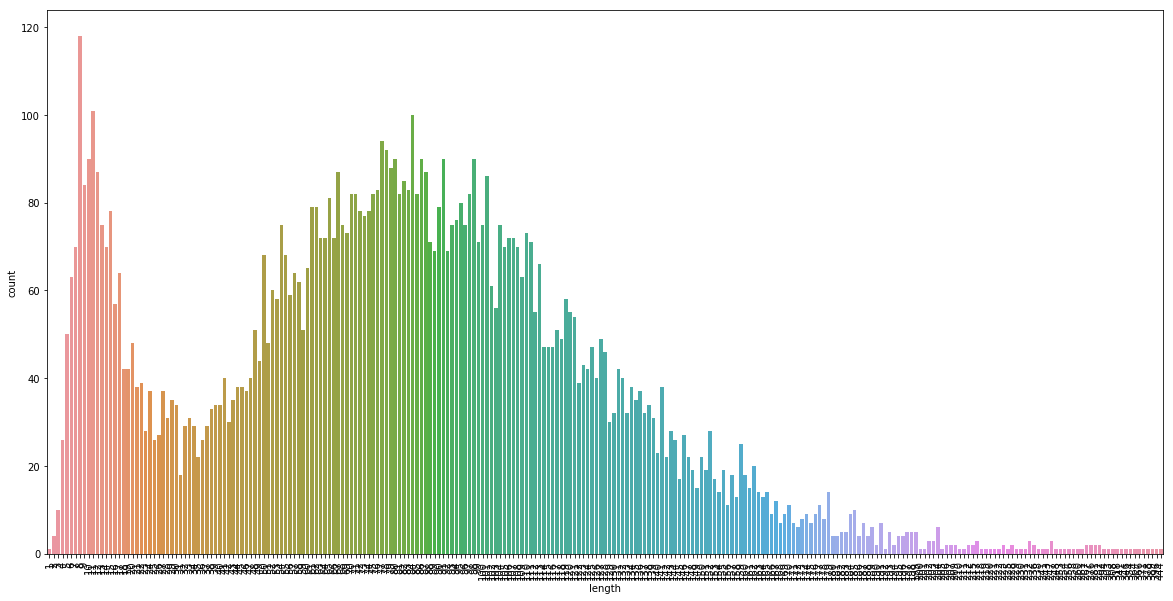

In [82]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
sns.barplot(x='length', y='count', data=pd_data, ax=ax)
plt.xticks(rotation=90)
# plt.savefig('./IMG/distribution_of_pub_length.pdf', format='pdf', bbox_inches='tight')

In [126]:
pub_concise.to_pickle('../data/pub_toks.pkl')

----

# Preprocessing scrapped `PDF`

In this section, we pre-process all the pdf that we seen in the Edinburgh Research Explorer. Some publications may not have any `pdf` (that is converted to txt (see infnet-scrapper/notebooks))

In [14]:
import os

In [38]:
collection = {}
txtdir = '../../infnet-scrapper/data/pdf2txt/txt/'
for txt in os.listdir(txtdir):
    txt_id = txt.split(".txt")[0]
    pdf = open(txtdir + txt)
    _txt = " ".join(pdf.readlines())
    if len(_txt) >= 1:
        collection[str(txt_id)] = str(_txt)
    else:
        print(txt_id)
    pdf.close()

03b5ea65-0e55-4ca1-bcd9-124484ae9b65
04edfd3c-35ee-44d7-a2ea-11ed5d7f7d1a
07ddf95b-5d2d-42f7-ae9e-cfdb914dae6d
0b45b3e8-a6c4-40a3-a108-942ec9ba85f7
0ec3bdbf-5de6-4607-aba9-862cadf626a4
20e71cdb-5e4d-4513-a3b8-7d416e35aeb4
2e98e3d6-0892-49fb-984e-d000a9505975
40cbb66f-1c5c-46f6-b9a3-d9fa59254aad
41899314-b749-41a4-b47e-521d4bd9b16a
45e72a8e-99a9-4e99-8b99-c02b01bb7008
48877653-39f8-4f4c-8bf2-80d2af6d0be7
53ff0dc9-6438-43d8-ac4b-40b699cb6bd8
61d43d74-2d5a-4caf-a063-edbe2a178cb8
6df05941-cac1-4822-9618-0953abbf8150
7557595b-8082-4278-90e4-d7fc4fbf3b86
75ab99bb-f99d-404a-82ac-121186506851
85900df7-dfcd-459c-af18-3f82254e0d70
8ce362b8-8c40-4760-9dc1-d8b5cc3622ed
996f454b-d2ac-4bc8-9779-ca158eedcdda
9d1702f3-63fb-49a1-85b2-6f6b5edcaa43
a1b50efd-61dd-4734-8493-983a07621321
a4caa3e2-b3ba-4bf9-abb0-1a79228c4721
a80888fe-96e5-4fee-ab1b-1457404e28ea
a95c419b-d44d-4ae6-892e-0a089f4d3476
b88208d0-709e-4237-a036-cc45dc53aa75
be1c98b3-010d-4e25-bcc0-6b1f7910eabb
befdc0f0-f710-4775-bc29-dd5a095b8459
c

In [39]:
len(collection)

2553

In [73]:
pdf2txt = pd.Series(collection).to_frame()
pdf2txt.rename(columns={0: 'pdf2txt'}, inplace=True)

In [74]:
pdf2txt.head(3)

,pdf2txt
00297304-61a7-4bb4-a89a-347a57f02778,Transferring CNNs to Multi-instance Multi-labe...
0089d717-9642-4970-a51d-d32b69bed24b,Multiagent Systems for Social Computation\n \n...
009a3bb6-15a1-4c0a-85c9-5df51cd3438e,A Linked Data Approach to Know-How\n Citation ...


In [79]:
pub_csv_combined = pub_csv.join(pdf2txt, how='left')

TypeError: join() got an unexpected keyword argument 'validate'

In [76]:
pub_csv_combined.head(3)

,date,year,title,authors,pub_url,doi_url,pdf_url,abstract,publications,pdf2txt
pub_id,,,,,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,1989,ballooning stability analysis of jet hmode dis...,d.p. o'brien|r. galvao|m. keilhacker|e. lazzar...,http://www.research.ed.ac.uk/portal/en/publica...,UNKNOWN,UNKNOWN,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,NaN
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,2013,query processing in data integration,paolo guagliardo|piotr wieczorek,http://www.research.ed.ac.uk/portal/en/publica...,UNKNOWN,UNKNOWN,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",NaN
309fdbfc-227b-4588-9264-f0f4e3cadfcb,Mar 1994,1994,comprehension syntax,p. buneman|l. libkin|d. suciu|v. tannen|l. wong,http://www.research.ed.ac.uk/portal/en/publica...,http://dx.doi.org/10.1145/181550.181564,http://www.research.ed.ac.uk/portal/files/1651...,the syntax of comprehensions is very close to ...,sigmod record,Comprehension Syntax\n \n Citation for publish...


In [80]:
pub_csv_combined_concise = pub_csv_combined[[
    'year', 'title', 'abstract', 'publications', 'pdf2txt'
]].copy()
pub_csv_combined_concise.fillna(value='', axis=1, inplace=True)

In [87]:
# Concatenate all the text together to form as the representation of the publication:
pub_csv_combined_concise['combined'] = pub_csv_combined_concise.apply(
    lambda row: str(row.title) + '. ' + str(row.abstract) + '. '+  str(row.publications) + '. ' + str(row.pdf2txt),
    axis=1)

In [100]:
pub_csv_combined_concise['toks'] = pub_csv_combined_concise.apply(
    lambda row: preprocess(row.combined.decode('utf8')), axis=1)

In [102]:
pub_csv_combined_concise.head(3)

,year,title,abstract,publications,pdf2txt,combined,toks
pub_id,,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,,ballooning stability analysis of jet hmode dis...,"[balloon, stabil, analysi, jet, hmode, dischar..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",,query processing in data integration. in this ...,"[queri, process, data, integr, chapter, illust..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,comprehension syntax,the syntax of comprehensions is very close to ...,sigmod record,Comprehension Syntax\n \n Citation for publish...,comprehension syntax. the syntax of comprehens...,"[comprehens, syntax, syntax, comprehens, close..."


In [114]:
pub_csv_combined_concise.to_pickle('../data/pub_toks_w_pdf2txt.pkl')

## Distribution of length of combined summary

In [103]:
pub_toks = pub_csv_combined_concise[['toks']].copy()

In [105]:
# inspect and check if there is any publication with no `summary_toks`
for row in pub_toks.iterrows():
    if len(row[1]['toks']) == 0:
        print((row[0]))

In [106]:
# get a distribution of length of tokens:
toksLengthHist = {}
for row in pub_toks.iterrows():
    l = len(row[1]['toks'])
    if l not in list(toksLengthHist.keys()):
        toksLengthHist[l] = 1
    else:
        toksLengthHist[l] += 1

In [107]:
lengthHist = [(v, k) for (v, k) in list(toksLengthHist.items())]

In [111]:
lengths = list(zip(*lengthHist))[0]
freq = list(zip(*lengthHist))[1]

In [112]:
data = [list(lengths), list(freq)]
pd_data = pd.DataFrame(np.array(data).T, columns=['length', 'count'])

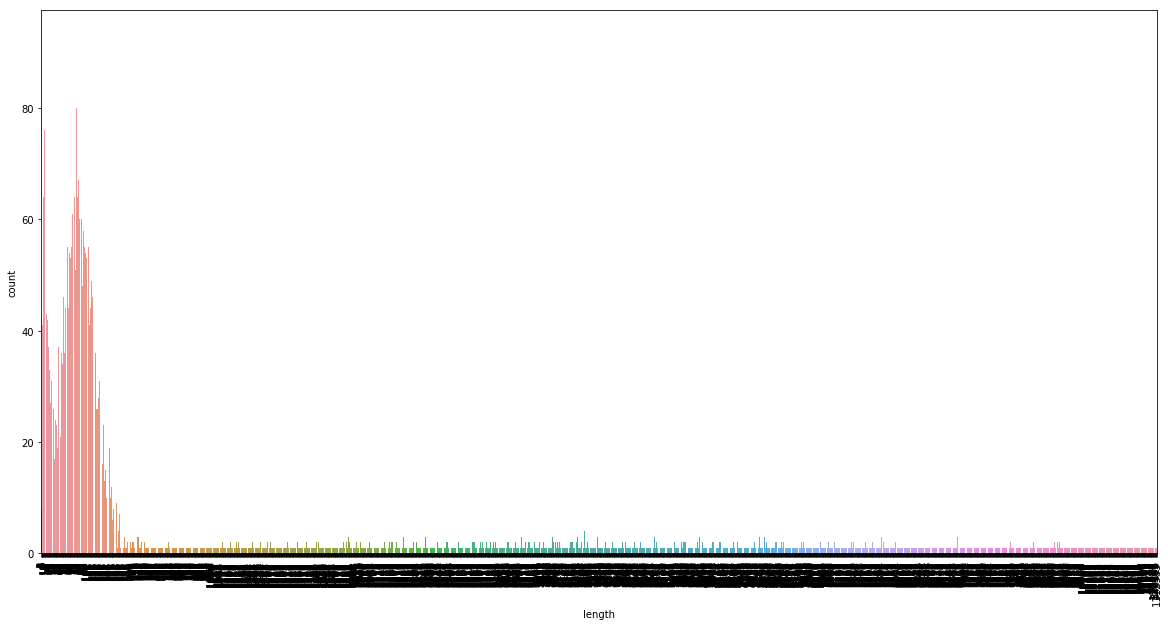

In [113]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
sns.barplot(x='length', y='count', data=pd_data, ax=ax)
plt.xticks(rotation=90)
# plt.savefig('./IMG/distribution_of_pub_length.pdf', format='pdf', bbox_inches='tight')

## Publications from `2012-2017`

In [2]:
pub_all = pd.read_pickle('../data/pub_toks_w_pdf2txt.pkl')

In [4]:
pub_all.head(3)

,year,title,abstract,publications,pdf2txt,combined,toks
pub_id,,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,,ballooning stability analysis of jet hmode dis...,"[balloon, stabil, analysi, jet, hmode, dischar..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",,query processing in data integration. in this ...,"[queri, process, data, integr, chapter, illust..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,comprehension syntax,the syntax of comprehensions is very close to ...,sigmod record,Comprehension Syntax\n \n Citation for publish...,comprehension syntax. the syntax of comprehens...,"[comprehens, syntax, syntax, comprehens, close..."


In [5]:
gb = pub_all.groupby('year')

In [6]:
sixYears = ['2017', '2016', '2015', '2014', '2013', '2012']
pd_years = {}
print("Year:\tPub count")
for yr, group in gb:
    if yr in sixYears:
        pd_years[yr] = group
        print(("{}:\t{}".format(yr, len(group))))

Year:	Pub count
2012:	573
2013:	623
2014:	629
2015:	583
2016:	645
2017:	521


In [7]:
pub_combined_yrs = pd.concat(list(pd_years.values()))

In [44]:
# Save the 2012-2017:
pub_combined_yrs.to_pickle('../data/pub_toks_w_pdf2txt_2012-17.pkl')

### Check how many of these publications doesnt have pdf2txt:

In [37]:
print(('{}\t{}\t{}'.format('Year:', 'Pub count', '#pdf2txt')))
for yr, df in list(pd_years.items()):
    _pdf2txts = df.pdf2txt.values
    count = len([len(a.strip()) for a in _pdf2txts if len(a) > 0])
    print(('{}\t{}\t\t{}'.format(yr, len(df), count)))

Year:	Pub count	#pdf2txt
2015	583		236
2014	629		235
2017	521		253
2016	645		313
2013	623		169
2012	573		143


In [17]:
len(pub_combined_yrs)

3574

Total of <b>1,349</b> publications, out of 3574, from 2012-2017 have pdf that can be converted to txt

In [38]:
pdf2txts = pub_combined_yrs.pdf2txt.values

In [39]:
num = 0
for t in pdf2txts:
    if len(t.strip()) == 0:
        num += 1

2225


In [40]:
lenhist = [len(t.strip()) for t in pdf2txts]

In [41]:
max(lenhist)

998916

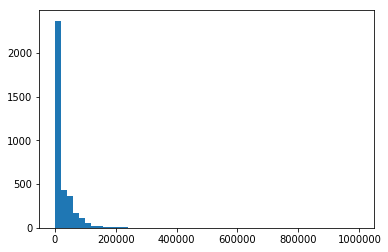

In [43]:
plt.hist(lenhist, 50)